![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor

TripAdvisor. Одна из проблем компании — это нечестные рестораны, которые 
накручивают себе рейтинг. Одним из способов нахождения таких ресторанов 
является построение модели, которая предсказывает рейтинг ресторана.
Если предсказания модели сильно отличаются от фактического результата, то,
возможно, ресторан играет нечестно, и его стоит проверить. 
Задача создать такую модель.

Датасет, содержащий сведения о 40 000 ресторанах Европы, модель, должна 
будет предсказывать рейтинг ресторана по данным сайта TripAdvisor на 
основе имеющихся в датасете данных.



**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re

from datetime import datetime, timedelta 
from itertools import combinations
from scipy.stats import ttest_ind

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
# Cмотрим данные

df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Мы видим, что данные можно разбить на две категории: 
* 1 - сведения о ресторане: номер ресторана, город расположения, кухня, 
    место в городе, рейтинг (целевая переменная), диапазон цен,
    URL страницы ресторана, ID_TA — идентификатор в базе данных TripAdvisor
   
* 2 - сведения о реакции посетителей ресторана:
    количество отзывов о ресторане, данные о двух отзывах


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
# Cмотрим названия столбцов, чтобы определить ошибки в них

data.columns 

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [14]:
# data.sample(5)

In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Функции обработки столбцов

In [16]:
# Функция проверки на выбросы
def outliers(df, col):
    # Межквартильный размах
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    range_s = df[col].min()  # Границы столбца
    range_e = df[col].max()

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    df[col].loc[df[col].between(
        perc25 - 1.5*IQR,
        perc75 + 1.5*IQR)].hist(bins=16, range=(range_s, range_e), label='В границах выбросов')

    df[col].hist(
        alpha=0.9, bins=16, range=(range_s, range_e), label='Все значения')

    df[col].loc[(df[col] >= (perc25 - 1.5*IQR)) & (df[col] <= (perc75 + 1.5*IQR))].hist(
        alpha=0.3, bins=16, range=(range_s, range_e), label='Без выбросов')

    plt.legend()
    print('Процентное соотношение значений столбца {}'.format(col))
    display(df[col].value_counts(normalize=True))

#  Функция подсчета уникальных значений и процент пустых значений


def uniq_nan(df, col):
    print("Всего значений {}:" .format(col), df[col].count())
    print("Уникальных значений {}:" .format(col), df[col].nunique())
    print("Пустых значений {}:" .format(col),
          "{:.1%}" .format(df[col].isnull().sum()/len(df)))


# функция замены количественных переменных на качественные


def Quan_to_Qual(col):
    col = col.apply(lambda x: 'no' if x == 0
                    else 'yes')
    display(pd.DataFrame(col.value_counts()))
    print("Уникальных значений:", col.nunique())

# Функция построения боксплотов


def get_boxplot(df, col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score',
                data=df.loc[df.loc[:, col].isin(
                    df.loc[:, col].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()


# данные типа int или float
def is_float(x):
    if data[x].dtype in ['int64', 'float64']:
        return True
    return False

# данные типа object


def is_object(x):
    if data[x].dtype == object:
        return True
    return False

# Функция заменяет пропуски на медианные данные в числовом столбце


def nan_median(column):
    column.fillna(value=column.median(), inplace=True)


# удаляем лишние символы
data.ID_TA = data.ID_TA.apply(lambda x: float(str(x).replace('d', '')))


# Создадим функцию для проведения теста Стьюдента:

def get_stat_dif_2(column):
    
    cols = data[data['sample'] == 1].loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    # Тест проводим на изначальном наборе данных без NA значений для целевого столбца, 
    # столбца с признаком, дополнительно исключив 0 для оценок
    stud_stat = data[data['sample'] == 1]
    for comb in combinations_all:
        if ttest_ind(stud_stat.loc[data[data['sample'] == 1].loc[:, column] == comb[0], 'Rating'],
                     stud_stat.loc[data[data['sample'] == 1].loc[:, column] == comb[1], 'Rating']).pvalue <= 0.05/len(combinations_all):  # учли поправку Бонферони
            # print('Найдены статистически значимые различия для колонки', column)
            pass
        else:
            return column 
            break

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

Посмотрим сколько пропусков в кадом столбце

In [17]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

In [18]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
# uint8 - Целые числа в диапазоне от 0 по 255 (числа размером 1 байт). 

In [19]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [20]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### Обработка признаков


In [21]:
uniq_nan(data, 'Restaurant_id')

Всего значений Restaurant_id: 50000
Уникальных значений Restaurant_id: 13094
Пустых значений Restaurant_id: 0.0%


In [22]:
# Поскольку есть повторяющиеся рестораны, добавим новый номинальный признак
# chain_rst = 1 сетевой
# chain_rst = 0 несетевой

chain_rst_list = list(data.Restaurant_id.value_counts()[
                      data.Restaurant_id.value_counts() > 1].index)
data['chain_rst'] = data[data.Restaurant_id.isin(
    chain_rst_list)].Restaurant_id.apply(lambda x: 1)
data['chain_rst'].fillna(0, inplace=True)
data['chain_rst'].value_counts()

1.0    46193
0.0     3807
Name: chain_rst, dtype: int64

In [23]:
uniq_nan(data, 'City')

Всего значений City: 50000
Уникальных значений City: 31
Пустых значений City: 0.0%


### Price Range

In [24]:
# Создаем словарь "город - самый популярный ценовой диапазон":
popular_range_dict = {}

# Функция для заполнения словаря:
def popular_price_range (city):
    
    Nhihg = data[(data.City == city) & (data['Price Range']== '$$$$')].Restaurant_id.count()#.ID_TA.count()
    Nmedium = data[(data.City == city) & (data['Price Range']== '$$ - $$$')].Restaurant_id.count()#.ID_TA.count()
    Nlow = data[(data.City == city) & (data['Price Range']== '$')].Restaurant_id.count()#.ID_TA.count()
    
    if (Nhihg > Nmedium) & (Nmedium >= Nlow):
        result = '$$$$'
    elif (Nlow > Nmedium) & (Nmedium >= Nhihg):
        result = '$'
    else:
        result = '$$ - $$$' 
    
    return result
           

# Заполняем словарь:
for city in list(data.City.unique()):
    popular_range_dict[city] = popular_price_range (city)


In [25]:
# popular_range_dict

In [26]:
# средний ценовой диапазон самый популярный во всех городах

In [27]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [28]:
# Переводим значения Price Range в числовые признаки от 1 до 3, 
# 1 соответствует самому низкому ценовому диапазону, 
# а 3 - самому высокому, пропуски заполняем 2 - 
# значением для среднего ценового диапазона:

# Заполняем пропуски 
# data['Price Range'].fillna(0, inplace=True) 
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)
# Cоздаем словарь:
price_range_dict = {
                   '$':        1,
                   '$$ - $$$': 2,
                   '$$$$':     3
                    }

# Переводим признаки в числа 
data['Price Range'] = data['Price Range'].map(price_range_dict)

In [29]:
# тест display(data['Price Range'].value_counts()) 

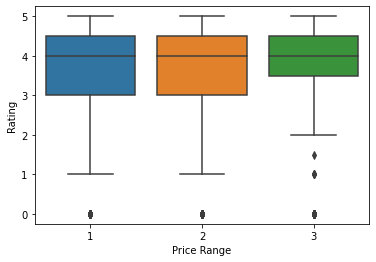

In [30]:
sns.boxplot(x='Price Range', y='Rating', data=data);


In [31]:
# Медианы у разных диапазонов близкие
# Самые дорогие рестораны реже получают низкие оценки.

In [32]:
#Смотрим минимальное значение отзывов:
min(list(data['Number of Reviews'].unique()))

0.0

In [33]:
# Заменим все пропуски на 0:
data['Number of Reviews'].fillna(0, inplace=True)

In [34]:
# Создаем словарь со средним количеством отзывов на один ресторан в городе:

Sum_N_Reviews = data.groupby(['City'])['Number of Reviews'].sum()
Count_N_Reviews = data.groupby(['City'])['Number of Reviews'].count()

Average_N_Reviews = {}
for city in list(data.City.unique()):
    Average_N_Reviews[city] = round(Sum_N_Reviews[city]/Count_N_Reviews[city])

In [35]:
# тест Average_N_Reviews

In [36]:
# Заменяем все нули на среднее по городу количество отзывов:
def number_of_reviews_med(row):
    if row['Number of Reviews'] == 0:
        result = Average_N_Reviews[row['City']]
    else:
        result = row['Number of Reviews']
    return result


data['Number of Reviews'] = data.apply(
    lambda row: number_of_reviews_med(row), axis=1)

In [37]:
#тест data['Number of Reviews'].min()

### Cuisine Style

In [38]:
# Заменим пропуски
data['Cuisine Style'].fillna("['Other']", inplace=True)

# Преобразуем строковые значения из Cuisine Style в списки:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))

# Создаем новый признак с количеством кухонь в ресторане Number оf Cuisine:
data['Number_оf_Cuisine'] = data['Cuisine Style'].apply(lambda x: len(x))

# Среднее количество кухонь в одном ресторане:
data['Number_оf_Cuisine'].sum()/50000

2.62532

In [39]:
# Посмотрим список всех кухонь и его размер:
all_cuisines = list(pd.Series(data['Cuisine Style'].sum()).unique())
all_cuisines.sort()
len(all_cuisines)

126

In [40]:
# Посчитаем как часто встречается та, или иная кухня:
cuisines_sum = pd.Series(data['Cuisine Style'].sum()).value_counts(ascending=True)
cuisines_sum

Burmese                    1
Latvian                    1
Salvadoran                 1
Xinjiang                   1
Yunnan                     2
                       ...  
Italian                 7433
Mediterranean           7820
Other                  11590
European               12561
Vegetarian Friendly    14021
Length: 126, dtype: int64

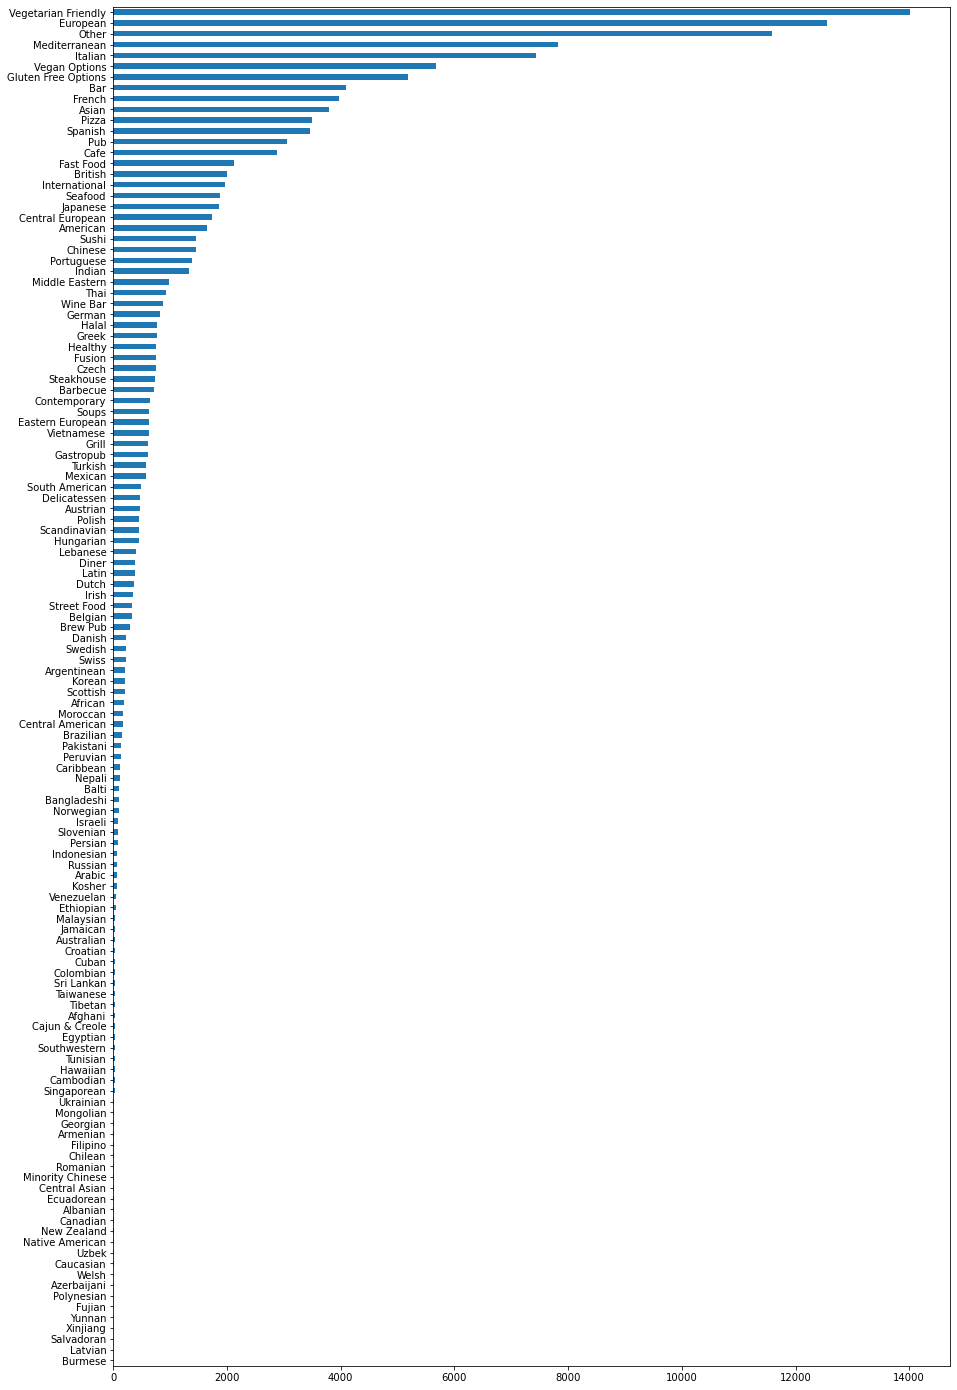

In [41]:
plt.figure(figsize=(15, 25))
cuisines_sum.plot(kind='barh');


In [42]:
# Посчитаем вес популярности каждой кухни 
# Cчитаем сумму всех полей в cuisine_sum:

sum_total = cuisines_sum.sum()

# Создаем словарь весов кухонь и заполняем его:
cuisines_index = {}
for cuisen in all_cuisines:
    cuisines_index[cuisen] = round(cuisines_sum[cuisen] / sum_total, 5)

In [43]:
# тест display(cuisines_index)  

In [44]:
# Добавим признак - количество кухонь ресторана, в завивисимости от популярности:

# Создаем функцию для заполнения колонки:
def number_cuisine_pop(x):
    
    sum_index = 0
    for c in x:
        sum_index = sum_index + cuisines_index[c]
    
    return sum_index

data['Number_Cuisene_Pops'] = data['Cuisine Style'].apply(lambda x: number_cuisine_pop(x))

data['Number_Cuisene_Pops']

0        0.05449
1        0.28872
2        0.10681
3        0.35820
4        0.37251
          ...   
49995    0.24624
49996    0.27644
49997    0.02522
49998    0.22390
49999    0.02633
Name: Number_Cuisene_Pops, Length: 50000, dtype: float64

### Ranking


In [45]:
# Создаем таблицу с общим количеством ранжируемых ресторанов в городе:
number_of_rest_data = data.groupby(['City'])['Ranking'].max()

In [46]:
# тест number_of_rest_data 

In [47]:
# Добавляем в data колонку c общим кол-вом ресторанов в городе:
data['Number_of_Rest'] = data.apply(
    lambda row: number_of_rest_data[row.City], axis=1)

In [48]:
# Добавляем в data колонку c нормализованным рангом ресторана в городе:
data['Norm_Ranking'] = round(data.apply(lambda row: row.Ranking
                                        / number_of_rest_data[row.City], axis=1), 2)

In [49]:
# тест  data['Norm_Ranking']

In [50]:
# Добавляем дополнительные признаки с численностью населения
# и уровенем конкуренции в городе (количество ресторанов на 1000 жителей):

# Создаем словарь с численностью населения городов в тыс.чел.:
population_size_dict = {
    'Amsterdam':    873,
    'Athens':       656,
    'Barcelona':   1637,
    'Berlin':      3669,
    'Bratislava':   438,
    'Brussels':    1211,
    'Budapest':    1768,
    'Copenhagen':   616,
    'Dublin':      1173,
    'Edinburgh':    488,
    'Geneva':       496,
    'Hamburg':     1899,
    'Helsinki':     655,
    'Krakow':       779,
    'Lisbon':       507,
    'Ljubljana':    284,
    'London':      9126,
    'Luxembourg':   115,
    'Lyon':         516,
    'Madrid':      3335,
    'Milan':       1404,
    'Munich':      1472,
    'Oporto':       268,
    'Oslo':         673,
    'Paris':       2148,
    'Prague':      1324,
    'Rome':        2791,
    'Stockholm':    962,
    'Vienna':      1921,
    'Warsaw':      1794,
    'Zurich':       429
}

# Создаем колонку с численностью населения в городе:
data['Population_Size'] = data.apply(
    lambda row: population_size_dict[row.City], axis=1)


# Создаем колонку с уровнем конкуренции в городе:
data['Level_of_Competition'] = round(data.apply(lambda row: number_of_rest_data[row.City]
                                                / population_size_dict[row.City], axis=1), 1)

In [51]:
# тест display(data['Population_Size'])

In [52]:
# тест display(data['Level_of_Competition']) 

### Restaurant_id

In [53]:
# Создаем таблицу с общим количеством ресторанов с одинаковым id: 
number_of_rest_id = data.groupby(['Restaurant_id'])['Ranking'].count()

In [54]:
# тест number_of_rest_id.sum() == 50000

In [55]:
# Добавляем в data колонку c общим кол-вом ресторанов c одинаковым рeйтингом:
data['Number_of_id'] = data.apply(
    lambda row: number_of_rest_id[row.Restaurant_id], axis=1)

In [56]:
# тест data['Number_of_id'].nunique() == number_of_rest_id.nunique() 

### Reviews

In [57]:
# Посмотрим на данные:
# data.Reviews.value_counts()

In [58]:
# Запоняем пропуски наиболее часто встречающимися значением:
data.Reviews.fillna('[[],[]]', inplace = True)

In [59]:
# Создаем столбец Review_Dates содержащий список дат отзывов:
pattern = re.compile('\d+\/\d+\/\d+')
data['Review_Date'] = data.Reviews.apply(pattern.findall)

In [60]:
# тест data['Review_Date'].sample(5)

In [61]:
# Сколько всего может быть дат:
data['Number_of_Date'] = data.Review_Date.apply(lambda x: len(list(x)))
data.Number_of_Date.value_counts()

2    36202
0     8114
1     5680
3        4
Name: Number_of_Date, dtype: int64

In [62]:
# Убираем лишние даты:
data.Review_Date = data.Review_Date.apply(lambda x: [x[-2], x[-1]] if len(x) > 2 else x)

# Проверяем, что получилось:
data['Number_of_Date'] = data.Review_Date.apply(lambda x: len(list(x))) 
data.Number_of_Date.value_counts() 

2    36206
0     8114
1     5680
Name: Number_of_Date, dtype: int64

In [63]:
# Добавляем два столбца сдатами
# переводим их в формат datetime64:

# Функции для заполнения столбцов:

def date1(x):
    if len(x) == 0:
        result = None
    elif len(x) == 1:
        result = x[0]
    else:
        result = min(x)
    return result


def date2(x):
    if len(x) == 0:
        result = None
    elif len(x) == 1:
        result = x[0]
    else:
        result = max(x)
    return result

# Заполняем столбцы:


data['Date1'] = pd.to_datetime(data.Review_Date.apply(lambda x: date1(x)))
data['Date2'] = pd.to_datetime(data.Review_Date.apply(lambda x: date2(x)))

In [64]:
# тест display(data['Date1'].head(5)) 

In [65]:
# тест display(data['Date2'].head(5))

In [66]:
# Cмотрим разницу между датами 2-х отзывов и ее макcимальное значение:
data['delta'] = (data.Date2 - data.Date1)/ np.timedelta64(1, "D")
x = list(data['delta'].unique()) 
x.sort()
print(x[-1])


3296.0


In [67]:
# Создаем колонку с количеством дней, отделяющих последний отзыв от date_max:

# Находим максимальную дату отзыва в датасете:
date_max = data['Date1'].max()
display(date_max)

# Заполняем колонку:
data['RevDeltaDMax'] = data.apply(lambda row: None if len(row.Review_Date) == 0
                                  else ((date_max-row.Date1)), axis=1) / np.timedelta64(1, "D")

# Находим максимальное значение в колонке:
FillMaxDate = data['RevDeltaDMax'].max()

# Заполняем пропуски максимальным значением в колонке:
data.RevDeltaDMax.fillna(FillMaxDate, inplace=True)

Timestamp('2018-02-26 00:00:00')

In [68]:
# тест data.RevDeltaDMax.value_counts() 

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [69]:
# Для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [70]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
11096,id_483,"[European, French, Polish, Bar, International,...",484.0,2,55.0,"[['Good tasty food at reasonable prices', 'Exp...",/Restaurant_Review-g274772-d6350630-Reviews-Dy...,6350630.0,1,4.5,...,0,0,0,0,0,0,0,0,0,0
29977,id_4875,[Other],4876.0,2,54.0,"[[], []]",/Restaurant_Review-g187791-d8784868-Reviews-Do...,8784868.0,1,3.5,...,0,0,0,0,1,0,0,0,0,0
36911,id_809,"[Dutch, European, Vegetarian Friendly, Gluten ...",811.0,2,142.0,"[['Great moment', 'Such a surprise'], ['12/20/...",/Restaurant_Review-g188590-d3418462-Reviews-Ba...,3418462.0,1,4.0,...,0,0,0,0,0,0,0,0,0,0
7295,id_7295,[Other],2998.0,2,17.0,[['Ok but its location predecessor was much b....,/Restaurant_Review-g190454-d8020309-Reviews-Go...,8020309.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
10248,id_778,"[Indian, Nepali, Vegetarian Friendly, Vegan Op...",779.0,1,45.0,"[['Vast variety of dishes', 'Great indian rest...",/Restaurant_Review-g189158-d8729508-Reviews-An...,8729508.0,1,4.5,...,0,0,0,0,0,0,0,0,0,0


## Убираем лишние колонки 

In [72]:
data.drop(['Cuisine Style','Review_Date', 'Number_of_Date', 
           'Date1', 'Date2', 'delta'], inplace=True, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   Ranking                  50000 non-null  float64
 2   Price Range              50000 non-null  int64  
 3   Number of Reviews        50000 non-null  float64
 4   Reviews                  50000 non-null  object 
 5   URL_TA                   50000 non-null  object 
 6   ID_TA                    50000 non-null  float64
 7   sample                   50000 non-null  int64  
 8   Rating                   50000 non-null  float64
 9   Number_of_Reviews_isNAN  50000 non-null  uint8  
 10  chain_rst                50000 non-null  float64
 11  Number_оf_Cuisine        50000 non-null  int64  
 12  Number_Cuisene_Pops      50000 non-null  float64
 13  Number_of_Rest           50000 non-null  float64
 14  Norm_Ranking          

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

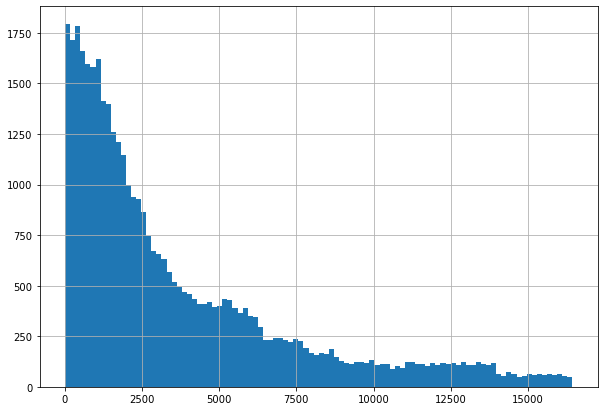

In [73]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

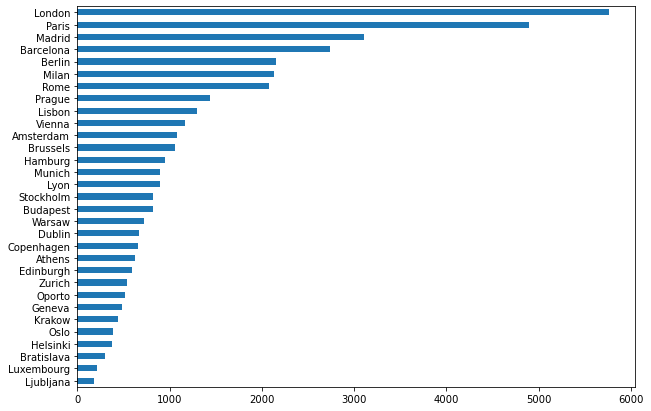

In [74]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

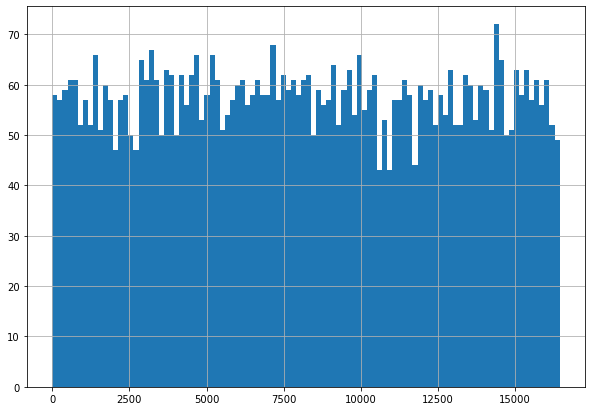

In [75]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

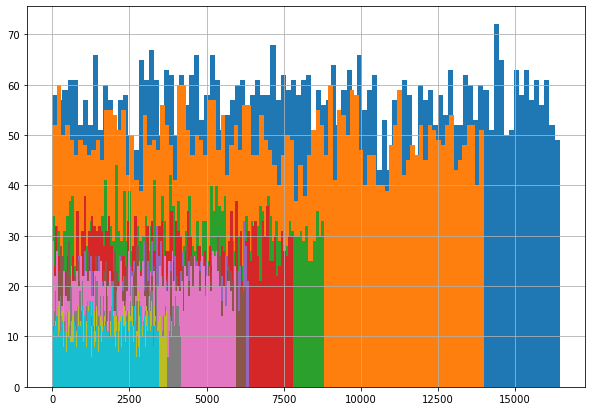

In [76]:
# Посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Посмотрим распределение целевой переменной

<AxesSubplot:>

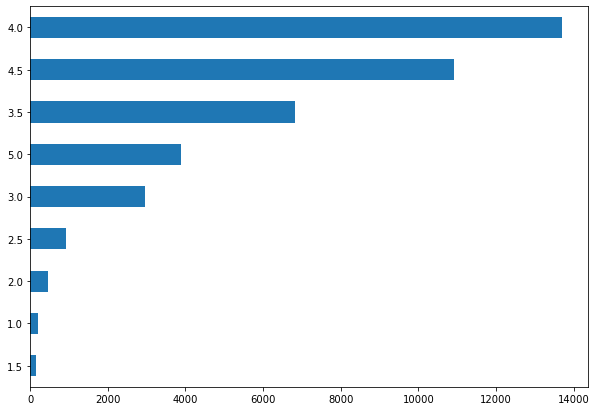

In [77]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

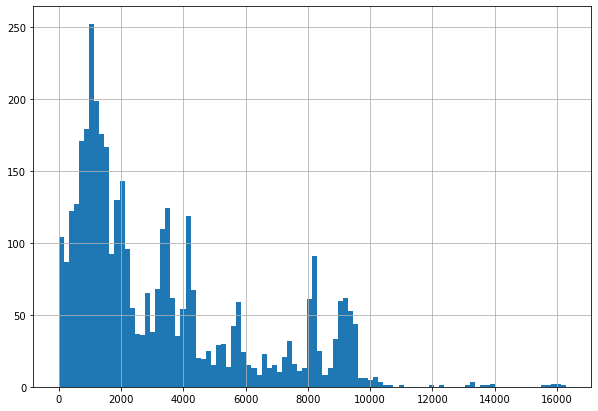

In [78]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

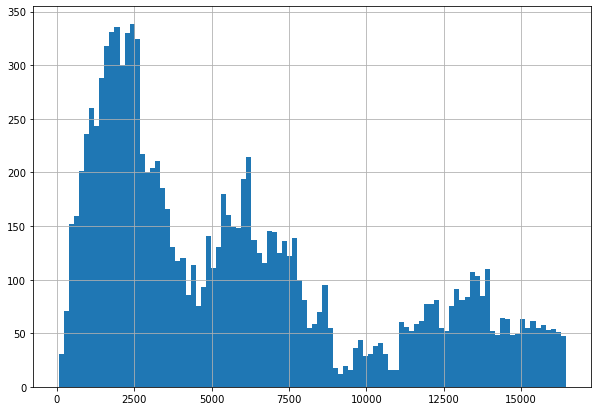

In [79]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### Корреляция числовых переменных

In [80]:
# Искоючим некоторые признаки
cols_to_drop = ['sample', 'City_Amsterdam',  'City_Athens',  'City_Barcelona', 'City_Berlin',  
                'City_Bratislava',  'City_Brussels',  'City_Budapest',  'City_Copenhagen',  
                'City_Dublin',  'City_Edinburgh',  'City_Geneva',  'City_Hamburg',  
                'City_Helsinki', 'City_Krakow',  'City_Lisbon',  'City_Ljubljana',  
                'City_London',  'City_Luxembourg',  'City_Lyon',  'City_Madrid',  'City_Milan',  
                'City_Munich',  'City_Oporto',  'City_Oslo',  'City_Paris', 'City_Prague',  
                'City_Rome',  'City_Stockholm',  'City_Vienna',  'City_Warsaw',  'City_Zurich',  
                'City_nan']

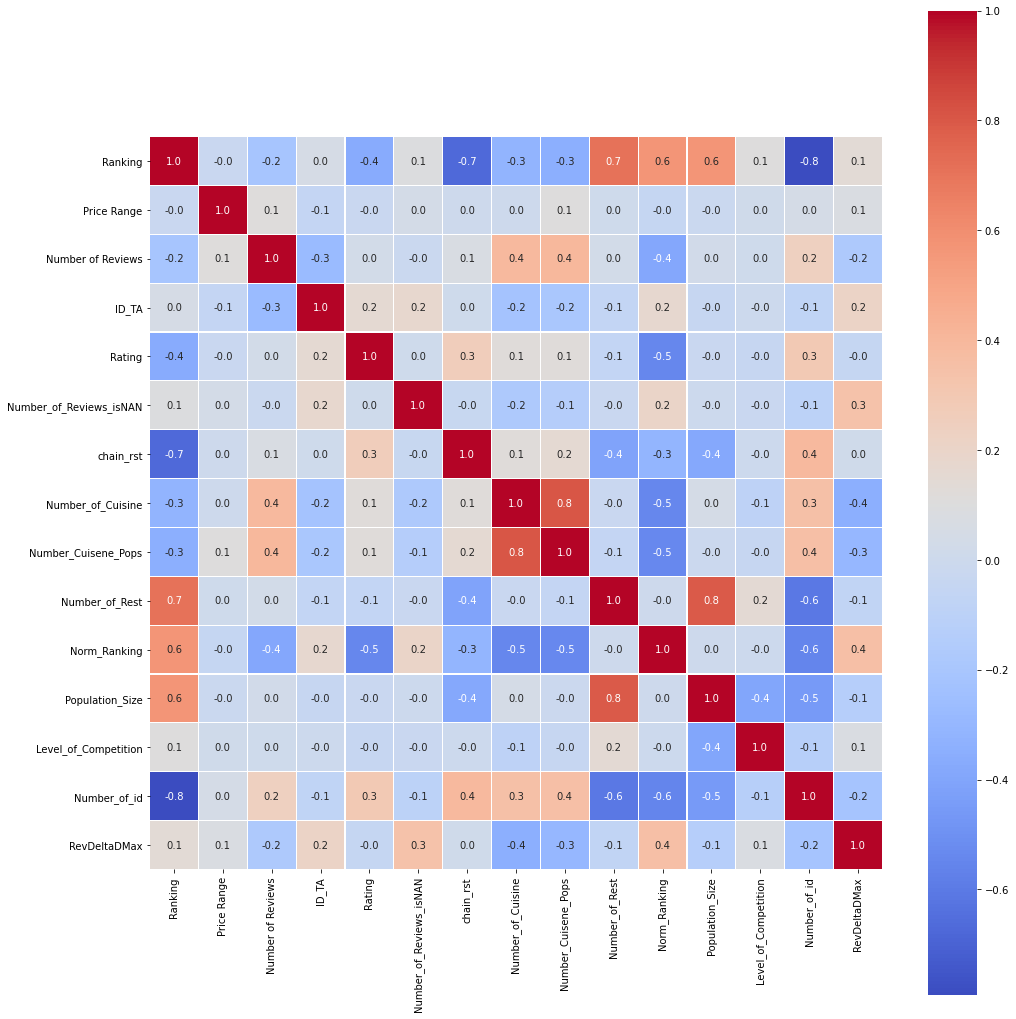

In [81]:
plt.rcParams['figure.figsize'] = (15,15)
data_corr = data
sns.heatmap(data_corr[data_corr['sample']== 1].drop(cols_to_drop, axis=1).corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="coolwarm");
plt.tight_layout()

С целевым рейтингом больше всего коррелируют нормированный и обычный рэнкинги.
Показатели Number_of_id, Number_of_Cusine и Population_Size имеют 
сильную корреляцию с другими признаками, поэтому их следует убрать.


In [82]:
# Создаем набор статистически незначимых признаков:
to_remove_features = set()

# Проходим по колонкам, которые исключали из корреляционного анализа
for column in cols_to_drop:
    to_remove_features.add(get_stat_dif_2(column))
print('\n Список признаков на удаление из обучения модели:', to_remove_features)


 Список признаков на удаление из обучения модели: {'City_Zurich', None, 'City_Helsinki', 'City_Hamburg', 'City_Geneva', 'City_Luxembourg', 'City_Copenhagen', 'City_Bratislava'}


#### Запускаем и проверяем что получилось

In [83]:
df_preproc = data
df_preproc.sample(3)

,Restaurant_id,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
36496,id_8826,8835.0,2,3.0,"[['Great lunch', 'Great food, excellent portio...",/Restaurant_Review-g186338-d12574129-Reviews-S...,12574129.0,1,4.5,0,...,0,0,0,0,0,0,0,0,0,0
17536,id_5092,5095.0,2,106.0,"[['Pleasantly surprised', 'A delicious late so...",/Restaurant_Review-g187514-d3783584-Reviews-El...,3783584.0,1,4.0,0,...,0,0,0,0,0,0,0,0,0,0
14621,id_901,906.0,2,2.0,"[['Elsalad X 2'], ['05/05/2017']]",/Restaurant_Review-g188057-d12435113-Reviews-E...,12435113.0,1,4.5,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# df_preproc.info()

In [85]:
# Убираем ненужные признаки:

# Убираем коллинеараные признаки:
df_preproc.drop(['Number_of_id','Population_Size','Number_оf_Cuisine'], axis = 1, inplace=True)

# Убираем статистически незначимые по тесту Стьюдента признаки:
df_preproc.drop(['City_Helsinki', 'City_Hamburg', 'City_Bratislava', 'City_Geneva', 'City_Zurich', 
                 'City_Copenhagen', 'City_Luxembourg'], axis = 1, inplace=True)


# удалим dtypes "object"
object_columns = [s for s in df_preproc.columns if df_preproc[s].dtypes == 'object']
df_preproc.drop(object_columns, axis = 1, inplace=True)

df_preproc.sample(3)

,Ranking,Price Range,Number of Reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,chain_rst,Number_Cuisene_Pops,Number_of_Rest,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_nan
45792,337.0,2,192.0,3452115.0,1,4.5,0,1.0,0.14667,1766.0,...,0,0,0,0,0,0,0,0,0,0
4298,960.0,2,141.0,991345.0,0,0.0,0,1.0,0.16406,8809.0,...,0,0,0,0,0,0,0,0,0,0
11119,3681.0,2,6.0,10254564.0,1,5.0,0,1.0,0.05957,8809.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [87]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [88]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 37), (40000, 37), (40000, 36), (32000, 36), (8000, 36))

# Model 
Сам ML

In [89]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [90]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [91]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [92]:
# Округлим с шагом 0.5
y_pred = np.round(y_pred * 2) / 2

In [93]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# baseline MAE: 0.21240125
# до округления MAE: 0.20627999999999996
# MAE: 0.1675

MAE: 0.1675


<AxesSubplot:>

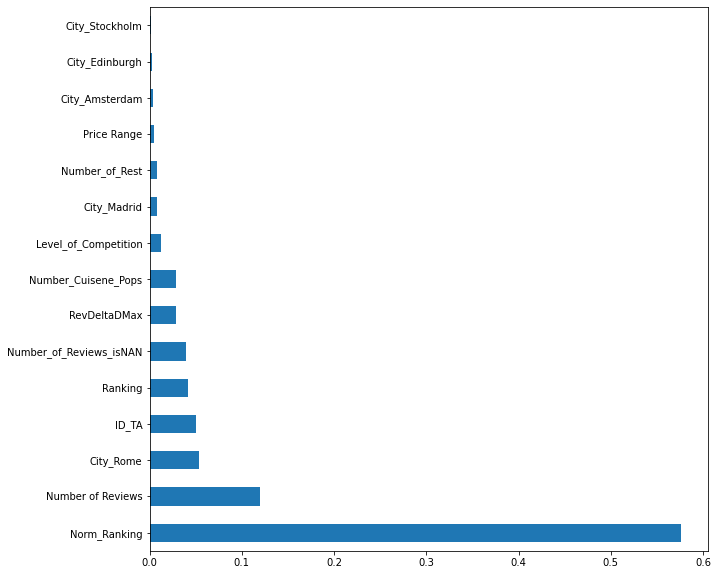

In [94]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [95]:
test_data.sample(3)

,Ranking,Price Range,Number of Reviews,ID_TA,Rating,Number_of_Reviews_isNAN,chain_rst,Number_Cuisene_Pops,Number_of_Rest,Norm_Ranking,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_nan
8240,5994.0,2,111.0,4570268.0,0.0,0,1.0,0.16237,6275.0,0.96,...,0,0,0,0,0,0,0,0,0,0
2517,3359.0,2,7.0,6848557.0,0.0,0,1.0,0.08829,3717.0,0.90,...,0,0,0,0,0,0,0,0,0,0
9611,502.0,2,375.0,2228036.0,0.0,0,0.0,0.22815,3444.0,0.15,...,0,0,0,0,0,0,0,1,0,0


In [96]:
test_data = test_data.drop(['Rating'], axis=1)

In [97]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [98]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [99]:
# Округлим с шагом 0.5
predict_submission = np.round(predict_submission * 2) / 2

In [100]:
predict_submission

array([3.5, 4.5, 4. , ..., 3. , 4.5, 4.5])

In [101]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.5
1,id_1,4.5
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


## Выводы

* Была осуществлена первичная обработка 
* Подсчитано количество пропусков и уникальных значений.
* Были добавлены новые признаки
* После анализа были отобраны некоррелирующие количественные переменные
* Была создана модель, предсказывающая рейтинг
* MAE изменилось с 0.4356 до 0.1675